# Digit Recognizer

A classic problem in the field of pattern recognition is that of handwritten digit recognition. Suppose that you have images of handwritten digits ranging from 0-9 written by various people in boxes of a specific size - similar to the application forms in banks and universities.

 

The goal is to develop a model that can correctly identify the digit (between 0-9) written in an image. 

Objective - You are required to develop a model using Support Vector Machine which should correctly classify the handwritten digits from 0-9 based on the pixel values given as features. Thus, this is a 10-class classification problem. 

### Reading and Understanding the data

In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.shape

(42000, 785)

In [4]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#data types
pd.DataFrame(train.dtypes)[0].value_counts()

int64    785
Name: 0, dtype: int64

We can see that all the columns are of data type int - and the number within the column corresponds to a single pixel-value associated with the corresponding label which is an image of 28 pixels in height and 28 pixels in width, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

### Data Preparation

Let's begin with checking if we have any null values in the data

In [6]:
train.isnull().sum().sort_values(ascending = False)

pixel783    0
pixel267    0
pixel265    0
pixel264    0
pixel263    0
pixel262    0
pixel261    0
pixel260    0
pixel259    0
pixel258    0
pixel257    0
pixel256    0
pixel255    0
pixel254    0
pixel253    0
pixel252    0
pixel251    0
pixel250    0
pixel249    0
pixel248    0
pixel247    0
pixel246    0
pixel245    0
pixel266    0
pixel268    0
pixel390    0
pixel269    0
pixel290    0
pixel289    0
pixel288    0
           ..
pixel495    0
pixel494    0
pixel493    0
pixel492    0
pixel491    0
pixel512    0
pixel513    0
pixel514    0
pixel526    0
pixel535    0
pixel534    0
pixel533    0
pixel532    0
pixel531    0
pixel530    0
pixel529    0
pixel528    0
pixel527    0
pixel525    0
pixel515    0
pixel524    0
pixel523    0
pixel522    0
pixel521    0
pixel520    0
pixel519    0
pixel518    0
pixel517    0
pixel516    0
label       0
Length: 785, dtype: int64

There are no missing values in the data, hence no missing value treatment is needed

Also, considering that all the columns are in integer data type, we don't need to do any variable encoding or dummy variable creation. Hence, let's proceed with Exploratory data analysis

### Exploratory Data Analysis

The very first thing that we need to do is to check the distribution of the labels to ensure that they're not skewed towards a couple of labels, and ensure that we're dealing with data that has enough observations for each of the label for training purposes

In [7]:
label_count = pd.DataFrame(train['label'].value_counts())
label_count['class'] = label_count.index

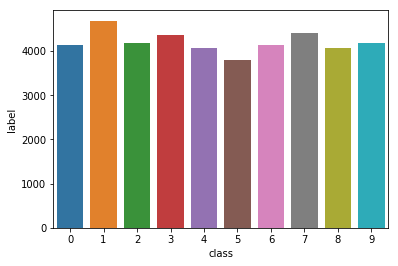

In [8]:
sns.barplot(x='class', y='label', data=label_count)

We observe that there is a decent distribution of observations across the different labels

Now, within each label, let's see have a look at the different average values of each variable to understand the distribution

In [9]:
train.groupby('label').mean()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
label,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.846626,0.939105,0.397182,0.086344,0.118155,0.027267,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


We can see that there are a number of columns where the average value is 0. These columns actually have no values apart from 0, and hence don't explain any variance in the data across observations. As a result, let's identify these columns and drop them.

In [10]:
empty_cols = pd.DataFrame(train.sum())
empty_cols['index'] = empty_cols.index
empty_cols.columns = ['cnt', 'index']

In [11]:
# filter out for those columns where there is no other value apart from 0
empty_cols_list = list(empty_cols.loc[empty_cols['cnt']==0, 'index'])

In [12]:
train_refined = train.drop(columns=empty_cols_list)

In [13]:
train_refined.sum()

label       187179
pixel12        126
pixel13        470
pixel14        216
pixel15          9
pixel32         16
pixel33         55
pixel34        443
pixel35       1145
pixel36       2138
pixel37       2789
pixel38       5442
pixel39       7313
pixel40       8035
pixel41       8005
pixel42       8234
pixel43       7197
pixel44       6908
pixel45       6372
pixel46       4423
pixel47       2553
pixel48       1893
pixel49        647
pixel50        442
pixel51        212
pixel58         64
pixel59         29
pixel60        308
pixel61        379
pixel62       2567
             ...  
pixel743    195592
pixel744    158446
pixel745    115454
pixel746     75451
pixel747     45776
pixel748     23654
pixel749     10062
pixel750      3928
pixel751      1043
pixel752        36
pixel753        59
pixel761       258
pixel762      1505
pixel763      3459
pixel764      4826
pixel765      7506
pixel766     12661
pixel767     17373
pixel768     21574
pixel769     23471
pixel770     28470
pixel771    

Now we have only those columns that have a value other than 0 for atleast 1 observation. 

Let's again look at the mean distribution now across each variable and label post the above level of data cleaning

In [14]:
train_refined.groupby('label').mean()

,pixel12,pixel13,pixel14,pixel15,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,...,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779
label,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.002394,0.051712,0.051712,0.002155,0.000000,0.000000,0.000000,0.003831,0.066794,0.079004,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.028040,0.061397,0.000000,0.000000,0.003868,0.013295,0.107082,0.272903,0.449359,0.594392,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.088616,5.517382,4.482163,3.161100,1.846626,0.939105,0.397182,0.086344,0.118155,0.027267
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Let's see if we can observe any sort of correlation between the labels and the mean values across each predictor variable

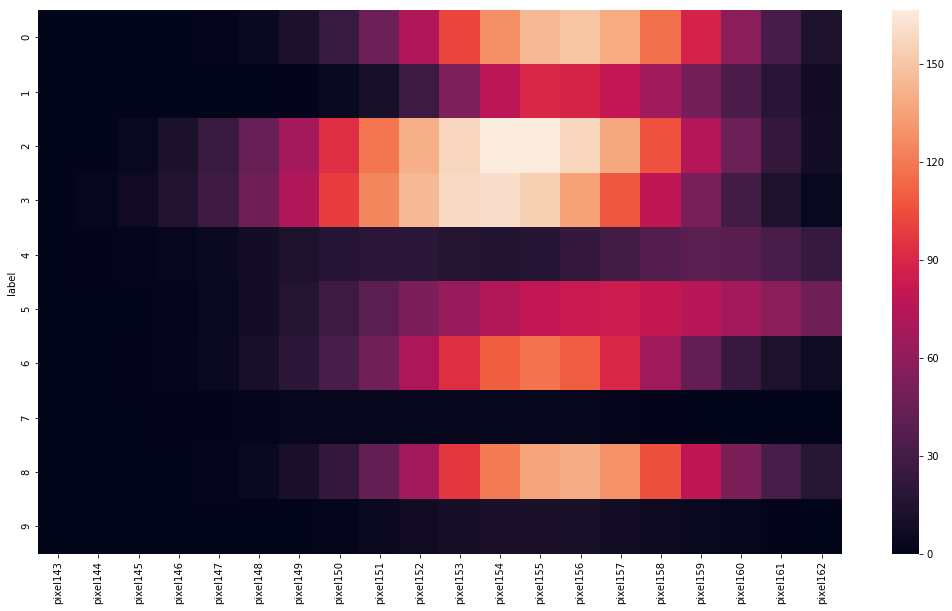

In [15]:
var_label_mean = train_refined.groupby('label').mean()

plt.figure(figsize=(18, 10))
sns.heatmap(var_label_mean.iloc[:,100:120])

Clearly we can see that some pixel variables have a clear correlation with the label

## Model Building

Let's build two different models - linear and non-linear with default hyperparameters, and compare the accuracies.

### Linear SVM Model

Considering we have over 40k observations in the train set, the time that the learning algorithm will take to process all of the data would be immense. Instead, let's look at taking a stratified sample so that we have a smaller number of observations, however, we have enough observations explaining each of the label

In [16]:
strat_sample_train = train_refined.groupby('label', group_keys=False).apply(lambda x: x.sample(min(len(x), 800)))

Now we have a train dataset that captures a wide sample of observations from the original dataset, ensuring that there are enough number of observations for each of the label i.e. atleast 1500 observations for each label

In [17]:
strat_sample_train['label'].value_counts()

7    800
3    800
6    800
2    800
9    800
5    800
1    800
8    800
4    800
0    800
Name: label, dtype: int64

In [18]:
strat_sample_train.head()

,label,pixel12,pixel13,pixel14,pixel15,pixel32,pixel33,pixel34,pixel35,pixel36,...,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779
18146,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35976,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15609,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12526,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9223,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Before we go ahead with the model building process, we saw from the means across the differnet variables that the scale varies for the different variables. Let's perform **feature scaling** on the predictor variables to bring them all to 1 scale

In [19]:
X = strat_sample_train.drop(columns='label')
y = strat_sample_train['label']

X_scaled = scale(X)

In [20]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 101)

model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

# predict
y_pred = model_linear.predict(X_test)

# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.92375 

[[249   0   1   0   0   2   0   0   1   0]
 [  0 245   0   0   0   0   0   0   0   0]
 [  3   1 218   6   1   0   1   3   2   1]
 [  1   2   7 200   1   2   1   2   7   1]
 [  1   1   2   0 226   0   0   1   1   6]
 [  3   2   1  17   3 213   5   0   9   0]
 [  3   0   5   0   0   3 225   0   0   0]
 [  1   0   3   2   5   0   0 217   0  11]
 [  2   4   2   5   2   7   3   3 203   1]
 [  2   0   1   3   8   1   0   7   1 221]]


The linear model gives approx. 90% accuracy.

### Non-Linear Model

Let's look at a **non-linear model** to see if it performs any better than the linear model

In [21]:
# non-linear model
# using rbf kernel, C=1, default value of gamma

# model
non_linear_model = SVC(kernel='rbf')

# fit
non_linear_model.fit(X_train, y_train)

# predict
y_pred = non_linear_model.predict(X_test)

In [22]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9329166666666666 

[[245   0   0   1   0   3   0   0   3   1]
 [  0 242   1   0   0   0   0   0   2   0]
 [  1   0 227   2   1   0   1   2   2   0]
 [  0   1   6 203   0   1   0   3   7   3]
 [  0   2   6   0 219   0   0   2   1   8]
 [  0   0   7  14   2 224   5   0   1   0]
 [  2   0   7   0   0   3 224   0   0   0]
 [  0   0  11   0   3   1   0 216   0   8]
 [  1   1   6   4   1   3   1   2 211   2]
 [  1   0   1   4   2   1   0   6   1 228]]


As we can see, the non-linear model has a higher accuracy compared to the linear model. As a result, let's go ahead with building a non-linear model, however this time tuning the hyperparameters to identify the most optimal one

#### Grid Search - Hyperparameter Tuning

Let's now tune the model to find the optimal values of C and gamma corresponding to an RBF kernel. Also, running a GridSearchCV() may take really long if we use a large value of k (fold-CV) such as 10 and a wide range of hyperparameters considering the fact that our train data is large; let's use k = 5, and hence a 5-fold cross validation.

In [23]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)                  


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 40.2min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'gamma': [0.01, 0.001, 0.0001], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [24]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,40.607520,0.667855,5.016444,0.428638,1,0.01,"{'C': 1, 'gamma': 0.01}",0.715179,0.743750,0.718750,...,0.722143,0.012657,12,0.999777,0.999554,0.999554,0.999777,0.999554,0.999643,0.000109
1,11.930459,0.324890,3.103083,0.114157,1,0.001,"{'C': 1, 'gamma': 0.001}",0.919643,0.930357,0.937500,...,0.926429,0.006814,4,0.972321,0.968080,0.968973,0.971652,0.970759,0.970357,0.001600
2,19.116029,2.025020,5.323446,0.665765,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.894643,0.890179,0.899107,...,0.890000,0.010139,8,0.909821,0.911384,0.907813,0.911607,0.908929,0.909911,0.001444
3,47.365020,3.761490,6.006434,0.736112,10,0.01,"{'C': 10, 'gamma': 0.01}",0.738393,0.758036,0.743750,...,0.741071,0.014507,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,11.678365,1.930790,3.304233,0.265736,10,0.001,"{'C': 10, 'gamma': 0.001}",0.929464,0.935714,0.941964,...,0.934464,0.004323,1,0.998884,0.998884,0.999107,0.998661,0.998661,0.998839,0.000167
5,7.973099,0.149639,2.849417,0.412383,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.914286,0.924107,0.934821,...,0.919464,0.009405,5,0.962500,0.957143,0.957589,0.961161,0.957812,0.959241,0.002167
6,47.118241,3.762423,5.422891,0.816754,100,0.01,"{'C': 100, 'gamma': 0.01}",0.738393,0.758036,0.743750,...,0.741071,0.014507,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
7,9.987048,0.833524,2.900368,0.331817,100,0.001,"{'C': 100, 'gamma': 0.001}",0.930357,0.934821,0.938393,...,0.932679,0.003937,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
8,5.631998,0.174074,2.121027,0.066641,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.915179,0.925893,0.918750,...,0.914821,0.007178,6,0.993750,0.993973,0.994196,0.993750,0.993973,0.993929,0.000167
9,39.594436,2.545309,4.942994,0.388300,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.738393,0.758036,0.743750,...,0.741071,0.014507,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


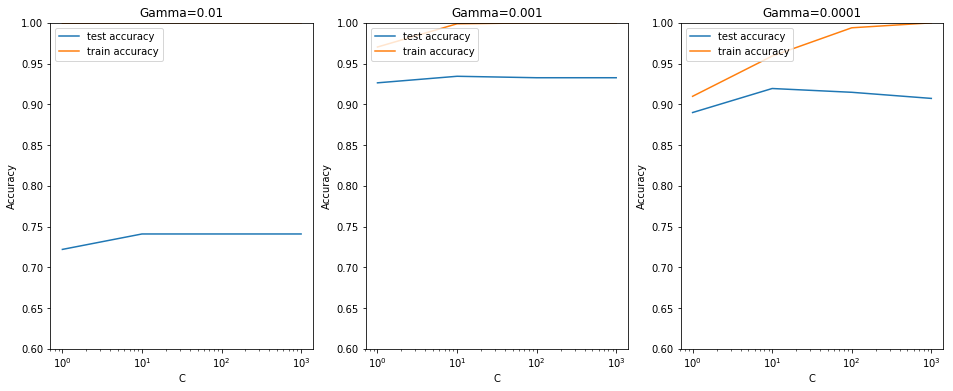

In [25]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


The plots above tells us that the Non-linear models (high gamma) perform *much better* than the linear ones and a high value of C leads to better performance and none of the models tend to overfit. <br>

This suggests that the data is **inherently non-linear** in nature, and a complex model will outperform simple, linear models in this case.

Choosing the optimal hyperparameters

In [26]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9344642857142857 corresponding to hyperparameters {'C': 10, 'gamma': 0.001}


Let's build our final model with the hyperparameters: 'C': 10, 'gamma': 0.001

### Building the final model

In [39]:
# model with optimal hyperparameters

# model
model = SVC(C=10, gamma=0.001, kernel="rbf")

model.fit(X_train, y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [40]:
y_pred = model.predict(X_test)

# metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")
print(metrics.confusion_matrix(y_test, y_pred), "\n")


accuracy 0.94625 

[[249   0   0   0   0   1   1   0   2   0]
 [  0 243   1   0   0   0   0   0   1   0]
 [  0   0 226   3   0   1   1   3   2   0]
 [  0   0   7 206   0   2   0   1   5   3]
 [  0   0   4   0 224   0   0   1   0   9]
 [  0   0   6  12   2 230   2   0   1   0]
 [  1   0   4   0   0   3 228   0   0   0]
 [  0   0  11   0   1   1   0 222   0   4]
 [  0   1   4   4   1   4   1   1 215   1]
 [  2   0   1   3   5   0   0   3   2 228]] 



We can see that the test accuracy on the test set is impressive at over 90%. This is the overall accuracy, however, let's look at the accuracy numbers class-wise to see if we're seeing a good accuracy number for each of the class labels

In [41]:
acc_matrix = metrics.confusion_matrix(y_test, y_pred)

In [42]:
ls = []
for i in range(len(acc_matrix[1,:])):
    temp = round(acc_matrix[i,i]/sum(acc_matrix[i]),2)
    ls.append(temp)

print('Class-wise accuracy for labels 0 - 9:', ls)

Class-wise accuracy for labels 0 - 9: [0.98, 0.99, 0.96, 0.92, 0.94, 0.91, 0.97, 0.93, 0.93, 0.93]


Text(0,0.5,'Accuracy')

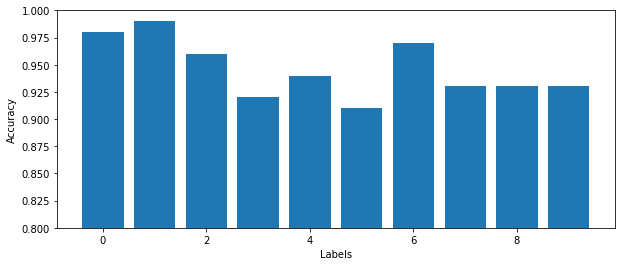

In [43]:
#Visualizing the classwise accuracy
label = list(range(0,10))

plt.figure(figsize=(10,4))
fig = plt.bar(label, ls)
plt.ylim(0.8,1)
plt.xlabel('Labels')
plt.ylabel('Accuracy')

We can see that the accuracy numbers for each of the labels is pretty high, and hence our model is good enough on the test dataset too.<br><br> Let's go ahead and run this model on the final test dataset provided in the problem statement

#### Running the model on the final test dataset

In [44]:
#Importing the test data

test = pd.read_csv('test.csv')
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Performing the same steps in data cleaning done on the training set, but this time on the test dataset

In [45]:
test_refined = test.drop(columns=empty_cols_list)

Perform feature scaling on the predictor variables

In [46]:
X_scaled = scale(test_refined)

Run the model on the scaled test dataframe to obtain the final value of predictions

In [47]:
y_pred_final = model.predict(X_scaled)

Finally - let's prepare the submission file in the format that is required in the kaggle competetion

In [48]:
y_pred_final = pd.DataFrame(y_pred_final)
y_pred_final['ImageId'] = y_pred_final.index+1
y_pred_final.columns = ['Label', 'ImageId']

In [49]:
y_pred_final[['ImageId', 'Label']].to_csv('final_submission.csv', index = False)

In [50]:
y_pred_final[['ImageId', 'Label']].head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,7
4,5,3
